# Cleaning Data
Examine the dataset that was given.

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import re
import string
from sklearn.feature_selection import chi2

In [97]:
import textmining_functions as tf

In [98]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

Examine train dataset

In [99]:
train_data.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [100]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


There are missing values in the following features: keyword, location

In [101]:
# Display percentage of missing values in keyword and location
print('Percentage of missing values in keyword: ', round(train_data['keyword'].isnull().sum()/len(train_data)*100, 2), '%')
print('Percentage of missing values in location: ', round(train_data['location'].isnull().sum()/len(train_data)*100, 2), '%')

Percentage of missing values in keyword:  0.8 %
Percentage of missing values in location:  33.27 %


Examine Test dataset

In [102]:
test_data.describe()

,id
count,3263.000000
mean,5427.152927
std,3146.427221
min,0.000000
25%,2683.000000
50%,5500.000000
75%,8176.000000
max,10875.000000


In [103]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


There are missing values in the following features: keyword, location

In [104]:
# Display percentage of missing values in keyword and location
print('Percentage of missing values in keyword: ', round(test_data['keyword'].isnull().sum()/len(test_data)*100, 2), '%')
print('Percentage of missing values in location: ', round(test_data['location'].isnull().sum()/len(test_data)*100, 2), '%')

Percentage of missing values in keyword:  0.8 %
Percentage of missing values in location:  33.86 %


To standardise what to replace the missing values with for both train and test data, there are a few options to choose from:
1. Fill missing values with a constant value
2. Fill missing values using the mode (most frequent value)
3. Remove rows with missing values
4. Remove columns with a high percentage of missing values

For keyword, the missing value percentage is only at 0.8%, which is quite low and thus substituting it with a constant value will suffice, as we do not want to remove any data given a training set of only 7613 samples, and test set of 3263 samples.

### Checkpoint for modifying copy of train and test data

In [105]:
train_data_mod = train_data.copy()
test_data_mod = test_data.copy()

### Text Feature Analysis

In [106]:
# describe the text column
train_data_mod['text'].describe()

count                                                  7613
unique                                                 7503
top       11-Year-Old Boy Charged With Manslaughter of T...
freq                                                     10
Name: text, dtype: object

In [107]:
# text column info
train_data_mod['text'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7613 entries, 0 to 7612
Series name: text
Non-Null Count  Dtype 
--------------  ----- 
7613 non-null   object
dtypes: object(1)
memory usage: 59.6+ KB


There are no missing values inside the text feature. However it is difficult to analyze the text in it's raw form. We will use text mining techniques to clean the text column.

- (optional) Converting text to lowercase (However may cause loss of information and ambiguity eg. 'US' --> 'us') 
- Removing special characters, URLS, and mentions
- Tokenization
- Spell checking and correction
- Stop word removal
- (optional) N-grams
- Part of Speech (POS) Tagging (assign grammatical labels)
- Lemmatization
- Named entity recognition

To simplify the process later on when we text mine for test dataset, the essential processes will be defined in functions in a separate file called textmining_functions.py


#### Converting text to lowercase (Execute only 1 of the cell below) 

In [108]:
train_data_mod['preprocess_text'] = train_data_mod['text']
test_data_mod['preprocess_text'] = test_data_mod['text']

In [109]:
train_data_mod['preprocess_text'] = tf.convert_to_lower(train_data_mod['text'])
test_data_mod['preprocess_text'] = tf.convert_to_lower(test_data_mod['text'])

#### Removing special characters, URLs, mentions


In [110]:
#Remove special characters, URLs, mentions
train_data_mod['preprocess_text'] = tf.remove_special_chars_urls_mentions(train_data_mod['preprocess_text'])
test_data_mod['preprocess_text'] = tf.remove_special_chars_urls_mentions(test_data_mod['preprocess_text'])

#### Tokenization

In [111]:
# Use function to tokenize
train_data_mod['preprocess_text'] = tf.tokenize_tweets(train_data_mod['preprocess_text'])
test_data_mod['preprocess_text'] = tf.tokenize_tweets(test_data_mod['preprocess_text'])


In [112]:
train_data_mod['preprocess_text'].head()

0    [our, deeds, are, the, reason, of, this, earth...
1        [forest, fire, near, la, ronge, sask, canada]
2    [all, residents, asked, to, shelter, in, place...
3    [13, 000, people, receive, wildfires, evacuati...
4    [just, got, sent, this, photo, from, ruby, ala...
Name: preprocess_text, dtype: object

Each word is now stored as an element of a list

#### Spell Checking and Correction

In [113]:
#Spell checking through 7000+ tweets take too long. So, we will use the spell checker on the test data instead.
# The execution time takes 17 minutes for train data, so we will only use this on the test data.
#------------------------------------------------------------
train_data_mod['preprocess_text'] = tf.correct_spelling(train_data_mod['preprocess_text'])


In [114]:
test_data_mod['preprocess_text'] = tf.correct_spelling(test_data_mod['preprocess_text'])

#### Stop words removal

In [115]:
# use function to remove stopwords
train_data_mod['preprocess_text'] = tf.remove_stopwords(train_data_mod['preprocess_text'])
test_data_mod['preprocess_text'] = tf.remove_stopwords(test_data_mod['preprocess_text'])


### Lemmatization

In [116]:
train_data_mod['preprocess_text'] = tf.lemmatize_words(train_data_mod['preprocess_text'])
test_data_mod['preprocess_text'] = tf.lemmatize_words(test_data_mod['preprocess_text'])

### Generate N-grams
- Unigram
- Bigram
- Trigram

It is important to note that the embedding models such as word2vec and GloVe are trained on unigrams, and thus we will only be using unigrams for those embedding model.

In [117]:
# generate new column for bigram
train_data_mod['bigram'] = tf.generate_ngrams(train_data_mod['preprocess_text'], 2)

In [118]:
test_data_mod['bigram'] = tf.generate_ngrams(test_data_mod['preprocess_text'], 2)

In [119]:
# generate new column for trigram
train_data_mod['trigram'] = tf.generate_ngrams(train_data_mod['preprocess_text'], 3)

In [120]:
test_data_mod['trigram'] = tf.generate_ngrams(test_data_mod['preprocess_text'], 3)

### Part of Speech Tagging
Assigning grammatical labels to each token or group of word.

In [121]:
# generate new column for POS
train_data_mod['pos'] = tf.pos_tagging(train_data_mod['preprocess_text'])

In [122]:
test_data_mod['pos'] = tf.pos_tagging(test_data_mod['preprocess_text'])

### Keyword Feature Analysis

In [123]:
# replace missing values in keyword with 'missing'
train_data_mod['keyword'] = train_data_mod['keyword'].fillna('missing')
test_data_mod['keyword'] = test_data_mod['keyword'].fillna('missing')


In [124]:
train_data_mod['keyword'].value_counts()

missing                  61
fatalities               45
deluge                   42
armageddon               42
sinking                  41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 222, dtype: int64

In [125]:
# unique values in keyword
train_data_mod['keyword'].nunique()

222

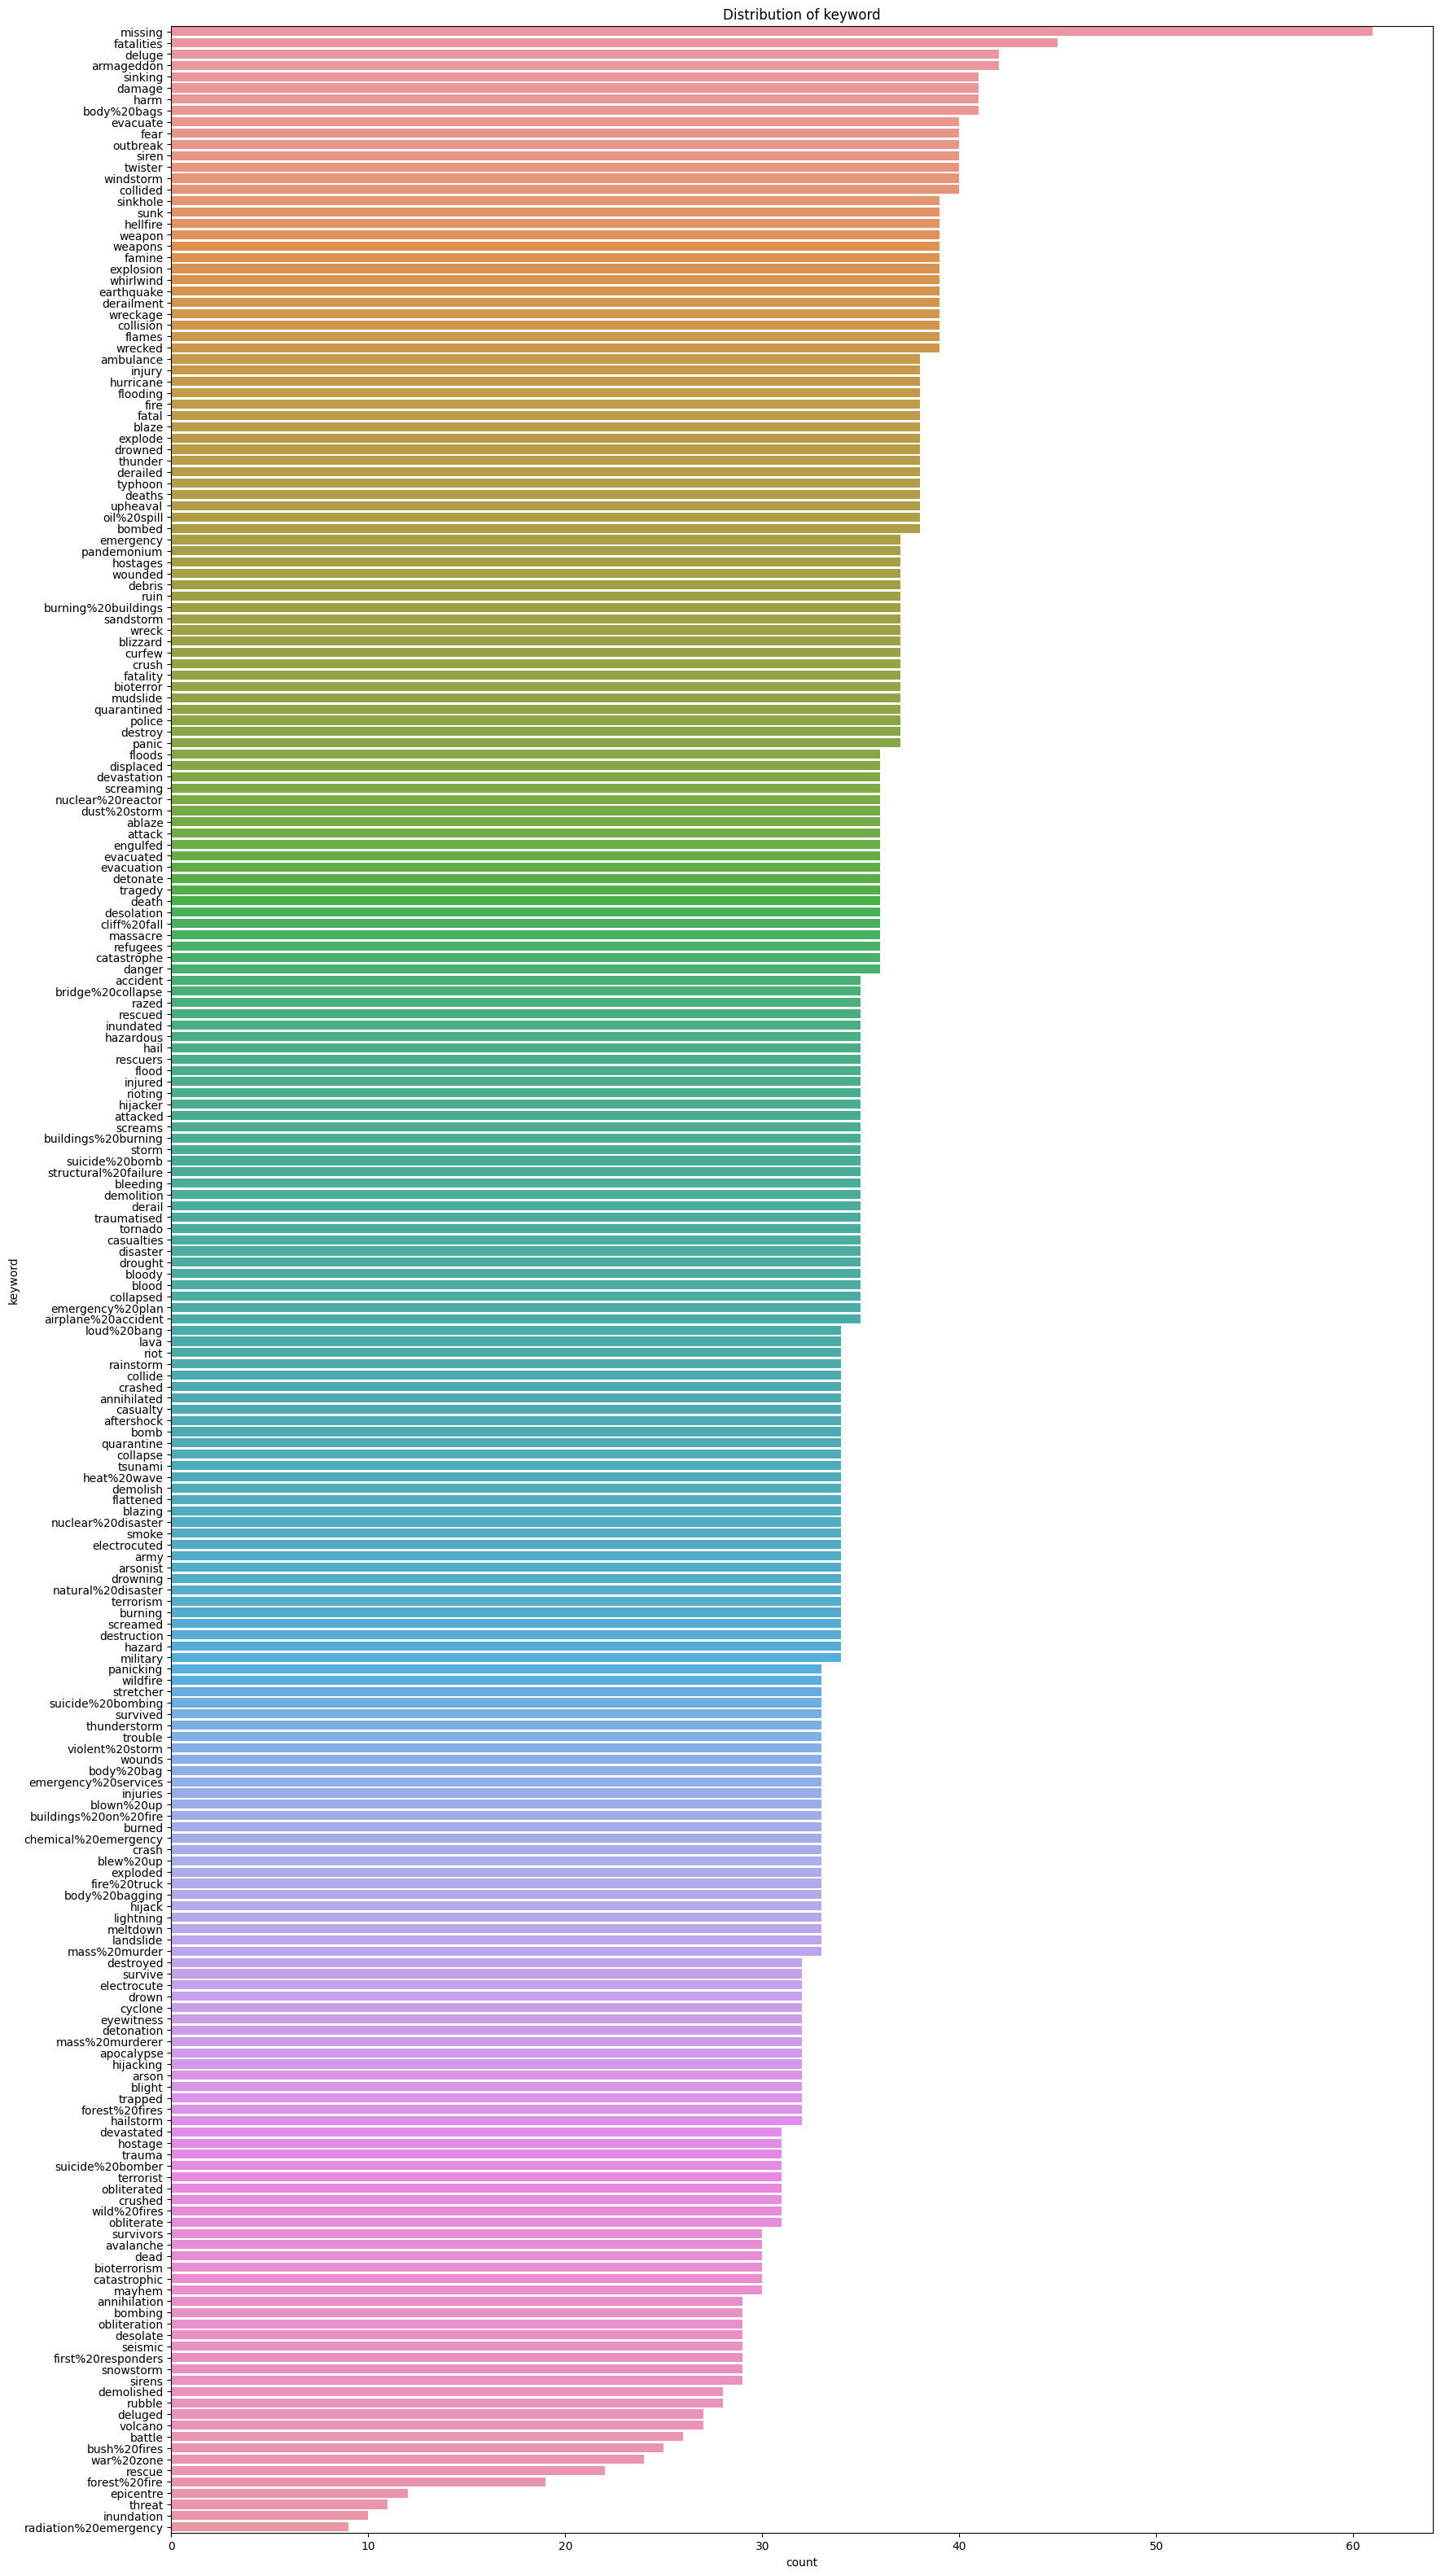

In [126]:
# barplot distribution of keyword
plt.figure(figsize=(20, 40))
sns.countplot(y=train_data_mod['keyword'], order=train_data_mod['keyword'].value_counts().index)
plt.title('Distribution of keyword')
plt.show()

- The Missing value we created have the highest count among all other keywords. 
- We can also observe that majority of keywords are saturated between 20 to 40 count range, this would mean that target encoding is suitable since only a small minority of groups may cause overfitting to its mean target value when applying target encoding.


Sort the counts of keywords based on target distribution

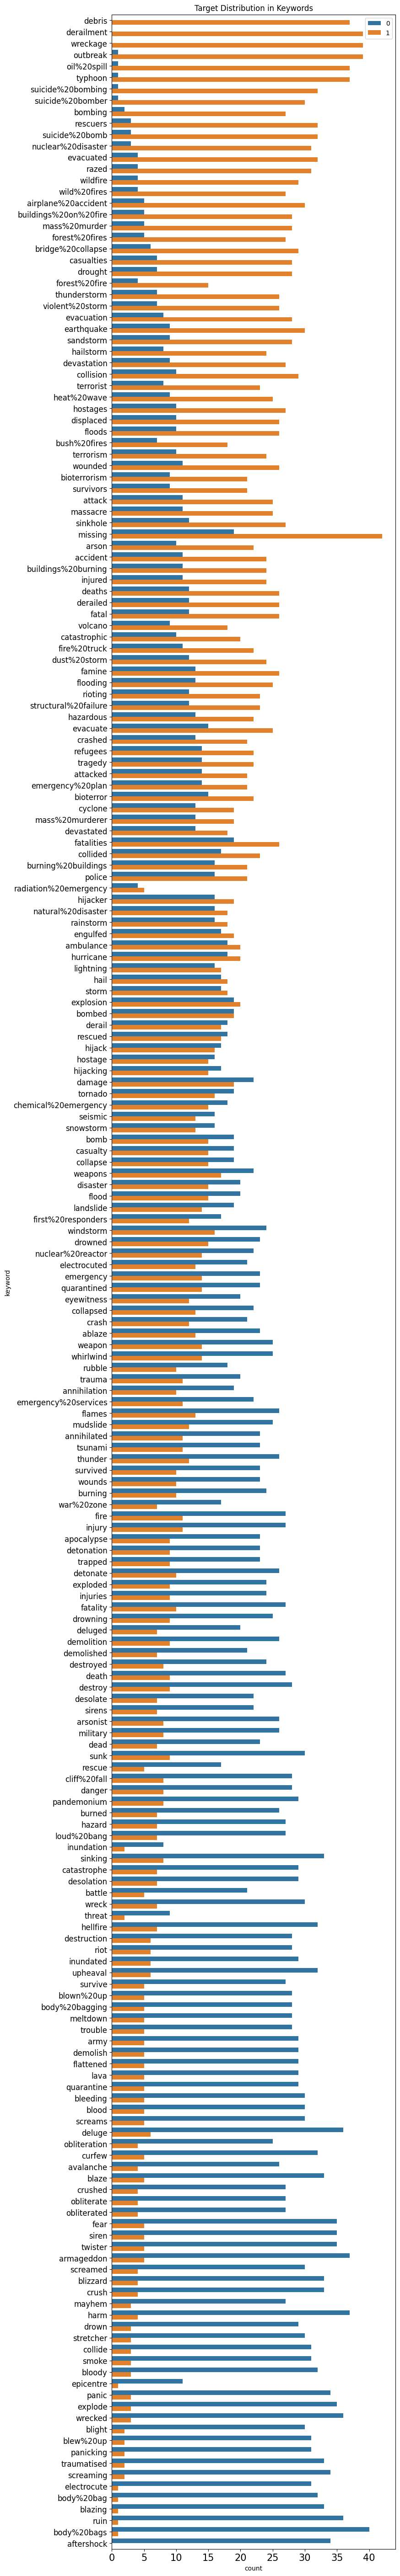

In [127]:
# Create a dictionary with keywords as keys and their target values as values
keyword_dict = train_data_mod.groupby('keyword')['target'].agg(['mean', 'count']).reset_index().to_dict(orient='records')

# Sort the dictionary by the number of target 1 and target 0
keyword_dict = sorted(keyword_dict, key=lambda x: (x['mean'], -x['count']), reverse=True)

# Extract the keywords and their counts from the sorted dictionary
sorted_keywords = [d['keyword'] for d in keyword_dict]
sorted_counts = [d['count'] for d in keyword_dict]

# Bar plot of keyword with target distribution
fig = plt.figure(figsize=(8, 72), dpi=100)

sns.countplot(y=train_data_mod['keyword'], hue=train_data_mod['target'], order=sorted_keywords)

plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=12)
plt.legend(loc=1)
plt.title('Target Distribution in Keywords')

plt.show()

- We can observe from the barplot that the keyword feature is a good indicator for the target. 
- However there is a high number of unique values in keyword feature, so one-hot encoding might lead to high dimensonality, which is not optimal.

### Location Feature Analysis

Looking through the location column, the data inputted is quite messy, and some of the location inputs are not even locations. We will examine the following:
- Unique counts in location
- Missing values in location

In [128]:
train_data_mod['location'].value_counts()

USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
MontrÌ©al, QuÌ©bec       1
Montreal                 1
ÌÏT: 6.4682,3.18287      1
Live4Heed??              1
Lincoln                  1
Name: location, Length: 3341, dtype: int64

In [129]:
train_data_mod['location'].describe()

count     5080
unique    3341
top        USA
freq       104
Name: location, dtype: object

In [130]:
# Percentage of unique values in location over the total number of values
print('Percentage of unique values in train set for location: ', round(train_data_mod['location'].nunique()/train_data_mod['location'].describe()[0]*100, 2), '%')

Percentage of unique values in train set for location:  65.77 %


In [131]:
test_data_mod['location'].describe()

count         2158
unique        1602
top       New York
freq            38
Name: location, dtype: object

In [132]:
# Percentage of unique values in location over the total number of values
print('Percentage of unique values in test set for location: ', round(test_data_mod['location'].nunique()/test_data_mod['location'].describe()[0]*100, 2), '%')

Percentage of unique values in test set for location:  74.24 %


Location feature has a high percentage of unique count over total count. This can result in high dimensionality if we use one-hot encoding which is not optimal.

Since location feature is missing about 33% of its data, it can be considered moderately high. Thus, if the location is not a good indicator of target, then the entire feature column could also be dropped. But we will try filling the missing values first and compare against the target to determine if there is a relationship.

In [133]:
# replace missing values in location with 'missing'
train_data_mod['location'] = train_data_mod['location'].fillna('missing_location')
test_data_mod['location'] = test_data_mod['location'].fillna('missing_location')


### Check for Target Distribution in Dataset for Train and Test

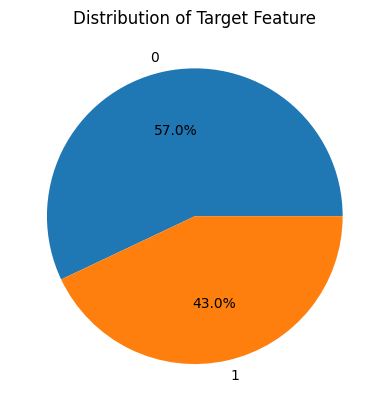

In [134]:
# Count the number of occurrences of each class
class_counts = train_data_mod['target'].value_counts()

# Create a pie chart of the class counts
plt.pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%')

# Add title
plt.title('Distribution of Target Feature')

# Show the plot
plt.show()


The target distribution in train dataset is roughly balanced so there is not much of a need to resample the dataset.

---
### Feature Hashing and Target Encoding


- Since there are so many unique values for both keywords and location, one-hot encoding is not a feasible choice. 
- We will employ feature hashing and target encoding instead.

Given the dataset and problem, We deciced to start with a moderate number of features, such as 50. The justification for this number is based on the following reasoning:

Dimensionality reduction: The keyword feature contains 222 unique values, including the 'missing' value. By choosing 50 hashed features, we can achieve substantial dimensionality reduction compared to one-hot encoding, which would create 222 new features.

Reduced risk of hash collisions: With 50 hashed features, the risk of hash collisions is reduced compared to smaller values. While hash collisions might still occur, the impact on model performance should be relatively minimal given that we are representing the information of the original categorical feature in a lower-dimensional space.

Computational considerations: Selecting 50 features allows us to capture a reasonable amount of information from the original feature while keeping the computational requirements of the model training process within acceptable limits. This means that our model training time and memory usage should be reasonable given the size of the dataset.

In [135]:
from sklearn.feature_extraction import FeatureHasher
from category_encoders import TargetEncoder

# Set the number of features for feature hashing
n_features = 50

In the code below, we applied feature hashing to both the `keyword` and `location` features, using `FeatureHasher` from the `sklearn.feature_extraction` module. We set the number of features to 50, meaning the hashing function maps each category to a vector of length 50.

In [136]:
# Feature hashing for the keyword column
hasher_keyword = FeatureHasher(n_features=n_features, input_type='string')
hashed_keywords_train = hasher_keyword.fit_transform(train_data_mod['keyword'].apply(lambda x: [x]))
hashed_keywords_test = hasher_keyword.transform(test_data_mod['keyword'].apply(lambda x: [x]))

# Feature hashing for the location column
hasher_location = FeatureHasher(n_features=n_features, input_type='string')
hashed_locations_train = hasher_location.fit_transform(train_data_mod['location'].apply(lambda x: [x]))
hashed_locations_test = hasher_location.transform(test_data_mod['location'].apply(lambda x: [x]))

In the code below, we applied target encoding to both the `keyword` and `location` features, using `TargetEncoder` from the `category_encoders` library. The target encoding process involves the following steps:

1. Calculate the mean target value for each category in the feature (using the training data only).
2. Replace each category in the feature with its corresponding mean target value.

In [137]:
# Target encoding for the keyword and location columns
target_encoder = TargetEncoder()
train_data_mod[['keyword_encoded', 'location_encoded']] = target_encoder.fit_transform(train_data_mod[['keyword', 'location']], train_data_mod['target'])
test_data_mod[['keyword_encoded', 'location_encoded']] = target_encoder.transform(test_data_mod[['keyword', 'location']])

Combine the hashed features and target encoded features with the original dataframe.

In [138]:
hashed_keywords_train_df = pd.DataFrame(hashed_keywords_train.toarray(), columns=[f'keyword_hash_{i}' for i in range(n_features)])
hashed_keywords_test_df = pd.DataFrame(hashed_keywords_test.toarray(), columns=[f'keyword_hash_{i}' for i in range(n_features)])
hashed_locations_train_df = pd.DataFrame(hashed_locations_train.toarray(), columns=[f'location_hash_{i}' for i in range(n_features)])
hashed_locations_test_df = pd.DataFrame(hashed_locations_test.toarray(), columns=[f'location_hash_{i}' for i in range(n_features)])

train_data_mod = pd.concat([train_data_mod, hashed_keywords_train_df, hashed_locations_train_df], axis=1)
test_data_mod = pd.concat([test_data_mod, hashed_keywords_test_df, hashed_locations_test_df], axis=1)

Now, let's examine the changes in the dataset after applying feature hashing and target encoding.

In [139]:
# Examine the hashed feature vectors for the keyword feature in the train dataset
hashed_keywords_train_df.head()

,keyword_hash_0,keyword_hash_1,keyword_hash_2,keyword_hash_3,keyword_hash_4,keyword_hash_5,keyword_hash_6,keyword_hash_7,keyword_hash_8,keyword_hash_9,...,keyword_hash_40,keyword_hash_41,keyword_hash_42,keyword_hash_43,keyword_hash_44,keyword_hash_45,keyword_hash_46,keyword_hash_47,keyword_hash_48,keyword_hash_49
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [140]:
# Examine the hashed feature vectors for the location feature in the train dataset
hashed_locations_train_df.head()

,location_hash_0,location_hash_1,location_hash_2,location_hash_3,location_hash_4,location_hash_5,location_hash_6,location_hash_7,location_hash_8,location_hash_9,...,location_hash_40,location_hash_41,location_hash_42,location_hash_43,location_hash_44,location_hash_45,location_hash_46,location_hash_47,location_hash_48,location_hash_49
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [141]:
# Examine the hashed feature vectors for the keyword feature in the test dataset
hashed_keywords_test_df.head()

,keyword_hash_0,keyword_hash_1,keyword_hash_2,keyword_hash_3,keyword_hash_4,keyword_hash_5,keyword_hash_6,keyword_hash_7,keyword_hash_8,keyword_hash_9,...,keyword_hash_40,keyword_hash_41,keyword_hash_42,keyword_hash_43,keyword_hash_44,keyword_hash_45,keyword_hash_46,keyword_hash_47,keyword_hash_48,keyword_hash_49
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [142]:
# Examine the hashed feature vectors for the location feature in the test dataset
hashed_locations_test_df.head()

,location_hash_0,location_hash_1,location_hash_2,location_hash_3,location_hash_4,location_hash_5,location_hash_6,location_hash_7,location_hash_8,location_hash_9,...,location_hash_40,location_hash_41,location_hash_42,location_hash_43,location_hash_44,location_hash_45,location_hash_46,location_hash_47,location_hash_48,location_hash_49
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [143]:
# Examine the target-encoded keyword and location features in the train dataset
train_data_mod[['keyword', 'keyword_encoded', 'location', 'location_encoded']].head()

,keyword,keyword_encoded,location,location_encoded
0,missing,0.684304,missing_location,0.424398
1,missing,0.684304,missing_location,0.424398
2,missing,0.684304,missing_location,0.424398
3,missing,0.684304,missing_location,0.424398
4,missing,0.684304,missing_location,0.424398


In [144]:
# Examine the target-encoded keyword and location features in the test dataset
test_data_mod[['keyword', 'keyword_encoded', 'location', 'location_encoded']].head()

,keyword,keyword_encoded,location,location_encoded
0,missing,0.684304,missing_location,0.424398
1,missing,0.684304,missing_location,0.424398
2,missing,0.684304,missing_location,0.424398
3,missing,0.684304,missing_location,0.424398
4,missing,0.684304,missing_location,0.424398


### Feature Hashing and Target Encoding Analysis

To compare the relationships between the hash features and encoded features with target, we use a combination of Correlation Analysis, Feature Importance Analysis and Model Performance Evaluation.

### Feature Hashing Analysis

#### 1. Correlation Analysis:

Since hash features are multiple columns, we calculate the absolute correlation between each hashed feature and the target variable, and then compare the average absolute correlations for `keyword_hash` and `location_hash`. This will give us an idea of which hashed feature set has a stronger relationship with the target.

In [145]:
# Calculate the absolute correlation between each hashed feature and the target variable
correlations_keyword = train_data_mod[[f'keyword_hash_{i}' for i in range(n_features)] + ['target']].corr().abs()['target'][:-1]
correlations_location = train_data_mod[[f'location_hash_{i}' for i in range(n_features)] + ['target']].corr().abs()['target'][:-1]

# Calculate the average absolute correlation for keyword_hash and location_hash
avg_corr_keyword = correlations_keyword.mean()
avg_corr_location = correlations_location.mean()

print(f"Average absolute correlation for keyword_hash: {avg_corr_keyword:.4f}")
print(f"Average absolute correlation for location_hash: {avg_corr_location:.4f}")

Average absolute correlation for keyword_hash: 0.0324
Average absolute correlation for location_hash: 0.0116


### 2. Feature Importance Analysis: 
We train a RandomForest machine learning model using both sets of `keyword_hash` and `location_hash` features, and then analyze the feature importance scores provided by the model. Feature importances can help us understand the relative importance of each feature in making predictions. The higher the importance score, the more useful the feature is in the model.

In [146]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Select features and target
X = train_data_mod[[f'keyword_hash_{i}' for i in range(n_features)] + [f'location_hash_{i}' for i in range(n_features)]]
y = train_data_mod['target']

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Print feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
print("Keyword_hash feature importances:", feature_importances[[f'keyword_hash_{i}' for i in range(n_features)]].sum())
print("Location_hash feature importances:", feature_importances[[f'location_hash_{i}' for i in range(n_features)]].sum())

Keyword_hash feature importances: 0.4412732795086896
Location_hash feature importances: 0.5587267204913102


### 3. Model Performance Evaluation:

Train multiple models using different combinations of features (`keyword_hash` only, `location_hash` only and both `keyword_hash` and `location_hash`) and evaluate their performance using metrics like accuracy, F1-score, precision, and recall. This will help us understand how much each feature contributes to the performance of the model.

In [147]:
# Train models using keyword_hash only
X_keyword = X[[f'keyword_hash_{i}' for i in range(n_features)]]
X_train_keyword, X_val_keyword, y_train_keyword, y_val_keyword = train_test_split(X_keyword, y, test_size=0.2, random_state=42)

# Train models using location_hash only
X_location = X[[f'location_hash_{i}' for i in range(n_features)]]
X_train_location, X_val_location, y_train_location, y_val_location = train_test_split(X_location, y, test_size=0.2, random_state=42)

# Evaluate model performance using keyword_hash + location_hash
y_pred = rf.predict(X_val)
print("Model performance using both keyword_hash and location_hash:")
print(classification_report(y_val, y_pred))

# Evaluate model performance using keyword_hash only
rf_keyword = RandomForestClassifier(random_state=42)
rf_keyword.fit(X_train_keyword, y_train_keyword)
y_pred_keyword = rf_keyword.predict(X_val_keyword)
print("Model performance using keyword_hash only:")
print(classification_report(y_val_keyword, y_pred_keyword))

# Evaluate model performance using location_hash only
rf_location = RandomForestClassifier(random_state=42)
rf_location.fit(X_train_location, y_train_location)
y_pred_location = rf_location.predict(X_val_location)
print("Model performance using location_hash only:")
print(classification_report(y_val_location, y_pred_location))

Model performance using both keyword_hash and location_hash:
              precision    recall  f1-score   support

           0       0.67      0.72      0.69       874
           1       0.58      0.52      0.55       649

    accuracy                           0.63      1523
   macro avg       0.62      0.62      0.62      1523
weighted avg       0.63      0.63      0.63      1523

Model performance using keyword_hash only:
              precision    recall  f1-score   support

           0       0.65      0.83      0.73       874
           1       0.63      0.40      0.49       649

    accuracy                           0.64      1523
   macro avg       0.64      0.61      0.61      1523
weighted avg       0.64      0.64      0.63      1523

Model performance using location_hash only:
              precision    recall  f1-score   support

           0       0.58      0.89      0.70       874
           1       0.48      0.14      0.21       649

    accuracy                      

Based on the outputs of each analysis, we can make a decision on which feature should be dropped. Let's examine each analysis:

1. Correlation Analysis:
The average absolute correlation for `keyword_hash` (0.0324) is higher than `location_hash` (0.0117). This indicates that `keyword_hash` has a stronger relationship with the target variable.

2. Feature Importance Analysis:
`keyword_hash` feature importances (0.4412) are lower than `location_hash` feature importances (0.5588). This suggests that `location_hash` contributes more to the model's performance.

3. Model Performance Evaluation:
When comparing the model performance using only one of the features, the model using `keyword_hash` only has an accuracy of 0.64, while the model using `location_hash` only has an accuracy of 0.57. The model performance using both features (accuracy 0.63) is not better than the model using `keyword_hash` only. This indicates that the model performs better when using `keyword_hash` only as a feature.

Considering all three analyses, we can conclude that the `location_hash` feature should be dropped. This is because it has a lower correlation with the target variable, a higher feature importance (which indicates that it might be causing overfitting), and results in a lower model accuracy when used as the only feature.

### Target Encoding Analysis

### 1. Correlation Analysis: 


We compare the correlation values between `keyword_encoded`, `location_encoded`, and the `target` variable. The higher the correlation value, the stronger the linear relationship between the feature and the target variable. However, keep in mind that correlation only captures linear relationships and does not account for non-linear dependencies or interactions between features.

In [148]:
correlations = train_data_mod[['keyword_encoded', 'location_encoded', 'target']].corr()
print(correlations)

                  keyword_encoded  location_encoded    target
keyword_encoded          1.000000          0.337370  0.545792
location_encoded         0.337370          1.000000  0.559423
target                   0.545792          0.559423  1.000000


### 2. Feature Importance Analysis: 

We train a RandomForest machine learning model using both `keyword_encoded` and `location_encoded` features, and then analyze the feature importance scores provided by the model. Feature importances can help us understand the relative importance of each feature in making predictions. The higher the importance score, the more useful the feature is in the model.

In [149]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Select features and target
X = train_data_mod[['keyword_encoded', 'location_encoded']]
y = train_data_mod['target']

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Print feature importances
feature_importances = rf.feature_importances_
print("Keyword_encoded importance:", feature_importances[0])
print("Location_encoded importance:", feature_importances[1])

Keyword_encoded importance: 0.4242105918170676
Location_encoded importance: 0.5757894081829323


### 3. Model Performance Evaluation:

Train multiple models using different combinations of features (`keyword_encoded` only, `location_encoded` only and both `keyword_encoded` and `location_encoded`) and evaluate their performance using metrics like accuracy, F1-score, precision, and recall. This will help us understand how much each feature contributes to the performance of the model.

In [150]:
# Train models using keyword_encoded only
X_keyword = train_data_mod[['keyword_encoded']]
X_train_keyword, X_val_keyword, y_train_keyword, y_val_keyword = train_test_split(X_keyword, y, test_size=0.2, random_state=42)

# Train models using location_encoded only
X_location = train_data_mod[['location_encoded']]
X_train_location, X_val_location, y_train_location, y_val_location = train_test_split(X_location, y, test_size=0.2, random_state=42)

# Evaluate model performance using keyword_encoded + location_encoded
y_pred = rf.predict(X_val)
print("Model performance using both keyword_encoded and location_encoded:")
print(classification_report(y_val, y_pred))

# Evaluate model performance using keyword_encoded only
rf_keyword = RandomForestClassifier(random_state=42)
rf_keyword.fit(X_train_keyword, y_train_keyword)
y_pred_keyword = rf_keyword.predict(X_val_keyword)
print("Model performance using keyword_encoded only:")
print(classification_report(y_val_keyword, y_pred_keyword))

# Evaluate model performance using location_encoded only
rf_location = RandomForestClassifier(random_state=42)
rf_location.fit(X_train_location, y_train_location)
y_pred_location = rf_location.predict(X_val_location)
print("Model performance using location_encoded only:")
print(classification_report(y_val_location, y_pred_location))

Model performance using both keyword_encoded and location_encoded:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       874
           1       0.81      0.82      0.81       649

    accuracy                           0.84      1523
   macro avg       0.83      0.83      0.83      1523
weighted avg       0.84      0.84      0.84      1523

Model performance using keyword_encoded only:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       874
           1       0.67      0.67      0.67       649

    accuracy                           0.72      1523
   macro avg       0.72      0.72      0.72      1523
weighted avg       0.72      0.72      0.72      1523

Model performance using location_encoded only:
              precision    recall  f1-score   support

           0       0.74      0.94      0.83       874
           1       0.88      0.55      0.68       649

    accuracy          

Based on the outputs of each analysis, we can make a decision on which feature should be dropped. Let's examine each analysis:

1. Correlation Analysis:
The correlation between `keyword_encoded` and target (0.545792) is slightly lower than the correlation between `location_encoded` and target (0.559423). This indicates that `location_encoded` has a marginally stronger relationship with the target variable.

2. Feature Importance Analysis:
`keyword_encoded` importance (0.4242105918170676) is lower than `location_encoded` importance (0.5757894081829323). This suggests that `location_encoded` contributes more to the model's performance.

3. Model Performance Evaluation:
When comparing the model performance using only one of the features, the model using `keyword_encoded` only has an accuracy of 0.72, while the model using `location_encoded` only has an accuracy of 0.78. The model performance using both features (accuracy 0.63) is worse than the models using either `keyword_encoded` only or `location_encoded` only. This indicates that the model performs better when using `location_encoded` only as a feature.

Considering all three analyses, we can conclude that the `keyword_encoded` feature should be dropped. This is because it has a slightly lower correlation with the target variable, a lower feature importance, and results in a lower model accuracy when used as the only feature.

### Conclusion

Overall, to make a decision on which feature to focus on, we can compare the best models from both cases.

For the hash features case, the best model is the one using `keyword_hash` only with an accuracy of 0.64.

For the encoded features case, the best model is the one using `location_encoded` only with an accuracy of 0.78.

Comparing the best models from both cases, the model using `location_encoded` only has a higher accuracy (0.78) compared to the model using `keyword_hash` only (0.64). Therefore, it would be better to focus on the encoded features case and drop the `keyword_encoded` feature. This decision is justified by the higher accuracy achieved by the model using `location_encoded` only, indicating better overall performance.

---

### Meta-Features
We should also consider whether meta-features could be used to extract additional information from the tweet data. These meta-features are expected to capture certain characteristics of the tweet text that may or may not be relevant for predicting whether a tweet is related to a real disaster or not.

Below are some of the possible meta-features.

In [151]:
# Length of the tweet
train_data_mod['tweet_length'] = train_data_mod['text'].apply(lambda x: len(str(x)))
test_data_mod['tweet_length'] = test_data_mod['text'].apply(lambda x: len(str(x)))

# Number of unique words
train_data_mod['word_count'] = train_data_mod['text'].apply(lambda x: len(str(x).split()))
test_data_mod['word_count'] = test_data_mod['text'].apply(lambda x: len(str(x).split()))

# unique_word_count
train_data_mod['unique_word_count'] = train_data_mod['text'].apply(lambda x: len(set(str(x).split())))
test_data_mod['unique_word_count'] = test_data_mod['text'].apply(lambda x: len(set(str(x).split())))

# Number of hashtags (#) used
train_data_mod['hashtag_count'] = train_data_mod['text'].apply(lambda x: len([c for c in str(x) if c == '#']))
test_data_mod['hashtag_count'] = test_data_mod['text'].apply(lambda x: len([c for c in str(x) if c == '#']))

# Number of mentions (@) of other users
train_data_mod['mention_count'] = train_data_mod['text'].apply(lambda x: len([c for c in str(x) if c == '@']))
test_data_mod['mention_count'] = test_data_mod['text'].apply(lambda x: len([c for c in str(x) if c == '@']))

# Average length of each word in the tweet
train_data_mod['avg_word_length'] = train_data_mod['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
test_data_mod['avg_word_length'] = test_data_mod['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# Number of exclamation marks
train_data_mod['exclaimation_count'] = train_data_mod['text'].apply(lambda x: len([c for c in str(x) if c == '!']))
test_data_mod['exclaimation_count'] = test_data_mod['text'].apply(lambda x: len([c for c in str(x) if c == '!']))

# Number of punctuations
train_data_mod['punctuation_count'] = train_data_mod['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
test_data_mod['punctuation_count'] = test_data_mod['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

# Number of URLs
train_data_mod['url_count'] = train_data_mod['text'].apply(lambda x: len(re.findall(r'http\S+', str(x))))
test_data_mod['url_count'] = test_data_mod['text'].apply(lambda x: len(re.findall(r'http\S+', str(x))))

# Number of stopwords
stop_words = set(stopwords.words('english'))
train_data_mod['stop_word_count'] = train_data_mod['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))
test_data_mod['stop_word_count'] = test_data_mod['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))

meta_features = ['tweet_length', 'word_count', 'unique_word_count', 'hashtag_count', 'mention_count', 'avg_word_length', 'exclaimation_count', 'punctuation_count', 'url_count', 'stop_word_count']

### Meta-Features Analysis

#### Evaluation of Meta-Features Based on Target Distribution
To select the appropriate meta-features, we can first compare their distributions between disaster and non-disaster tweets using a histogram.

By examining these histograms, we can see that some determine if the feature is useful if they have a more distinct distributions between the two classes.

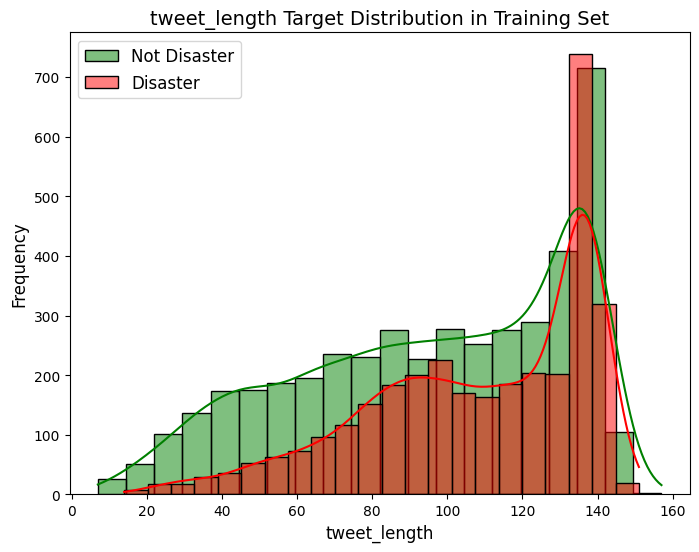

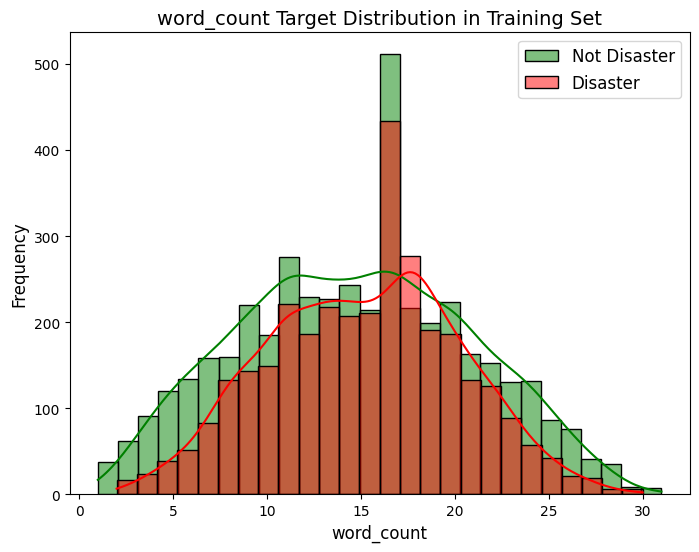

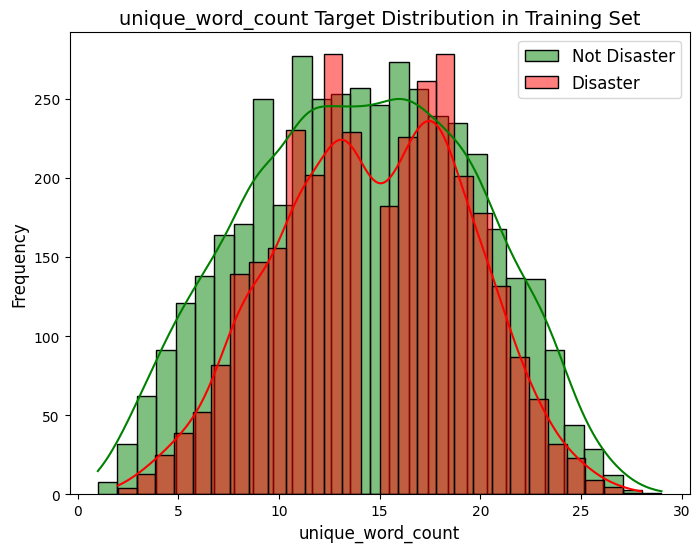

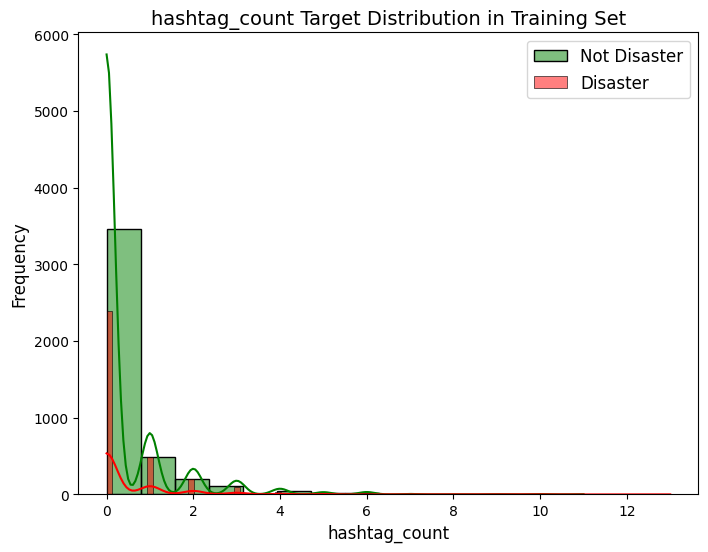

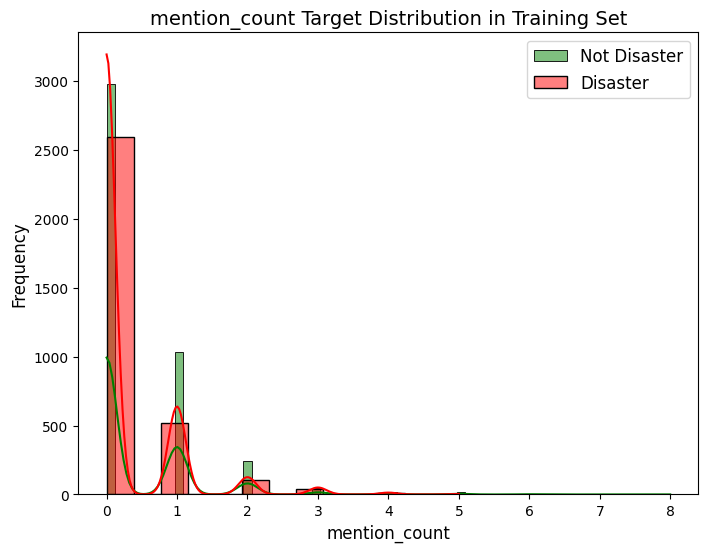

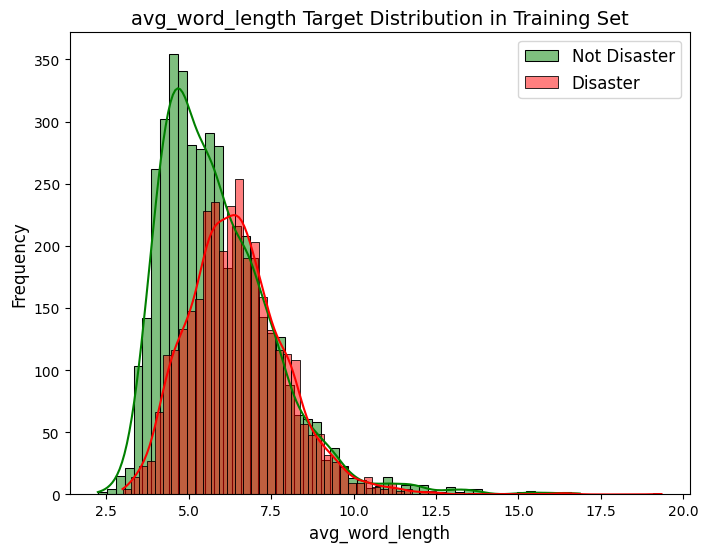

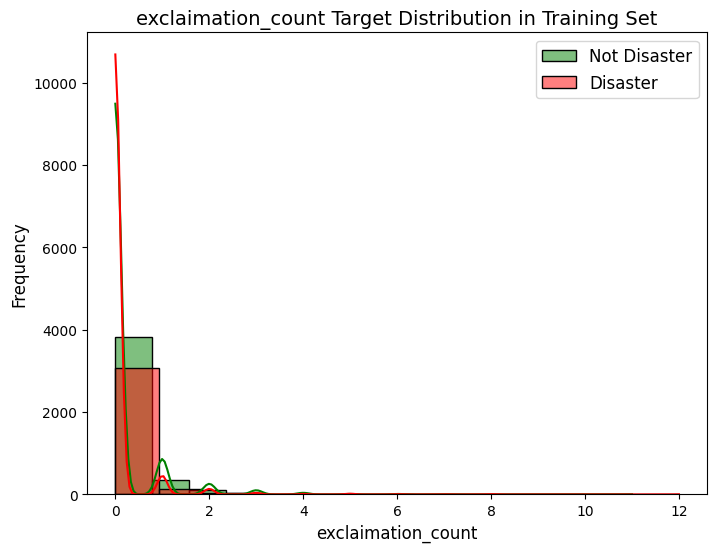

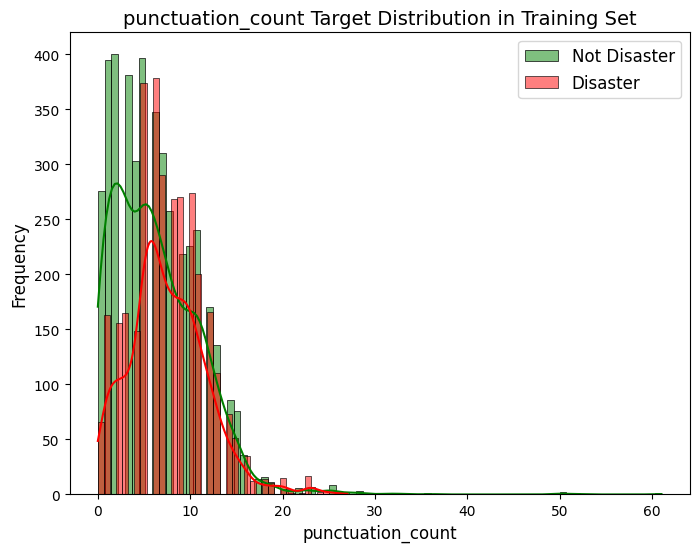

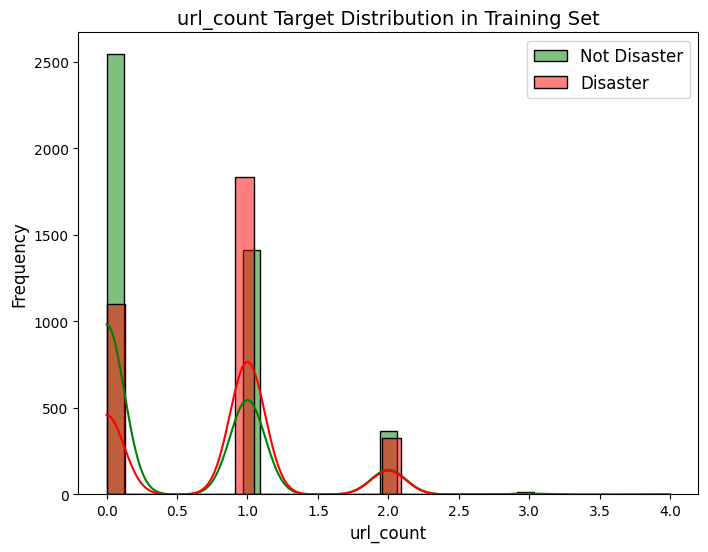

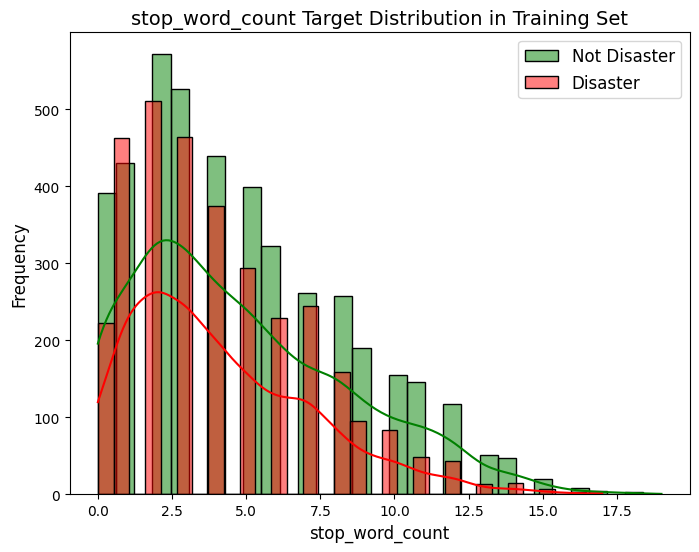

In [152]:
for feature in meta_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(train_data_mod.loc[train_data_mod['target'] == 0, feature], label='Not Disaster', color='green', alpha=0.5, kde=True)
    sns.histplot(train_data_mod.loc[train_data_mod['target'] == 1, feature], label='Disaster', color='red', alpha=0.5, kde=True)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title(f'{feature} Target Distribution in Training Set', fontsize=14)
    plt.legend(fontsize=12)
    plt.show()


- We can see that 'tweet_length', 'avg_word_length', 'punctuation_count' and 'stop_word_count' have the most noticeable difference in their distributions between disaster and non-disaster tweets
- This suggests that these meta-features could be more useful in predicting the target variable, compared to the rest

#### Evaluating Meta-Features using Fisher Scores
Another feature selection method is the use of Fisher scores.

Fisher scores measure the strength of association between a feature and the target variable, with higher scores indicating stronger association. We have calculated Fisher scores for each of the selected metafeatures, along with their corresponding p-values.

The table below shows the Fisher scores and p-values for each of the selected metafeatures.

In [153]:
x = train_data_mod[meta_features]
y = train_data_mod['target']

# Calculate chi2 and p-values
chi_scores, p_values = chi2(x, y)

fisher_scores = pd.DataFrame({'feature': meta_features, 'fisher_score': chi_scores, 'p_value': p_values})

# Sort the features by fisher_score in descending order
fisher_scores = fisher_scores.sort_values(by='fisher_score', ascending=False)

fisher_scores.style.format({'fisher_score': '{:.2f}', 'p_value': '{:.2e}'}).hide(axis="index")

feature,fisher_score,p_value
tweet_length,2837.51,0.00e+00
punctuation_count,415.69,2.12e-92
url_count,207.18,5.66e-47
stop_word_count,192.45,9.30e-44
mention_count,116.32,4.05e-27
avg_word_length,109.06,1.58e-25
exclaimation_count,105.32,1.04e-24
hashtag_count,69.57,7.37e-17
unique_word_count,42.03,8.97e-11
word_count,26.81,2.25e-07


After evaluating the meta-features using two feature selection methods, we can observe that 'tweet_length' and 'punctuation_count' are the top two features that have the strongest association with the target variable. Therefore, we can narrow down our set of meta-features to only include these two variables for further analysis.

In [154]:
# Update meta_features
meta_features = ['tweet_length', 'punctuation_count']

In [155]:
# export
train_data_mod.to_csv('train_data_mod.csv', index=False)
test_data_mod.to_csv('test_data_mod.csv', index=False)